In [1]:
# Magics
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
import logging

import elfi
import pylfire
import graphviz

import numpy as np
import matplotlib.pyplot as plt

from pylfire.models import arch

 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning:The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


In [3]:
# Get logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [4]:
# Get the arch model
m = arch.get_model(seed_obs=123)

INFO:pylfire.models.arch:true_params were not given. Now using [t1, t2] = [0.3, 0.7].


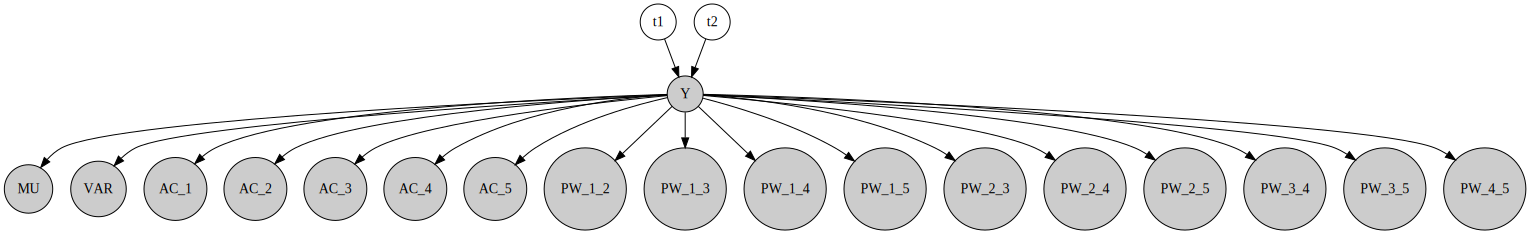

In [5]:
# Draw the model
elfi.draw(m)

In [6]:
# Create a grid for parameters
n = 25

t1 = np.linspace(-1, 1, n)
t2 = np.linspace(0, 1, n)

tt1, tt2 = np.meshgrid(t1, t2, indexing='ij')

params_grid = np.c_[tt1.flatten(), tt2.flatten()]

In [7]:
from pylfire.methods.lfire import LFIRE

In [8]:
# LFIRE method
lfire_method = LFIRE(
    model=m,
    params_grid=params_grid,
    batch_size=500 
)

INFO:pylfire.methods.lfire:New marginal data (500 x 17) are generated.


In [9]:
# Run inference
%time lfire_res = lfire_method.infer()

Progress: |██████████████████████████████████████████████████| 100.0% Complete
CPU times: user 19min 22s, sys: 17 s, total: 19min 39s
Wall time: 12min 8s


In [10]:
# Print summary
lfire_res.summary()

Method: LFIRE
Number of simulations: 312500
MAP estimates: t1: 0.417, t2: 0.625
Posterior means: t1: 0.303, t2: 0.715



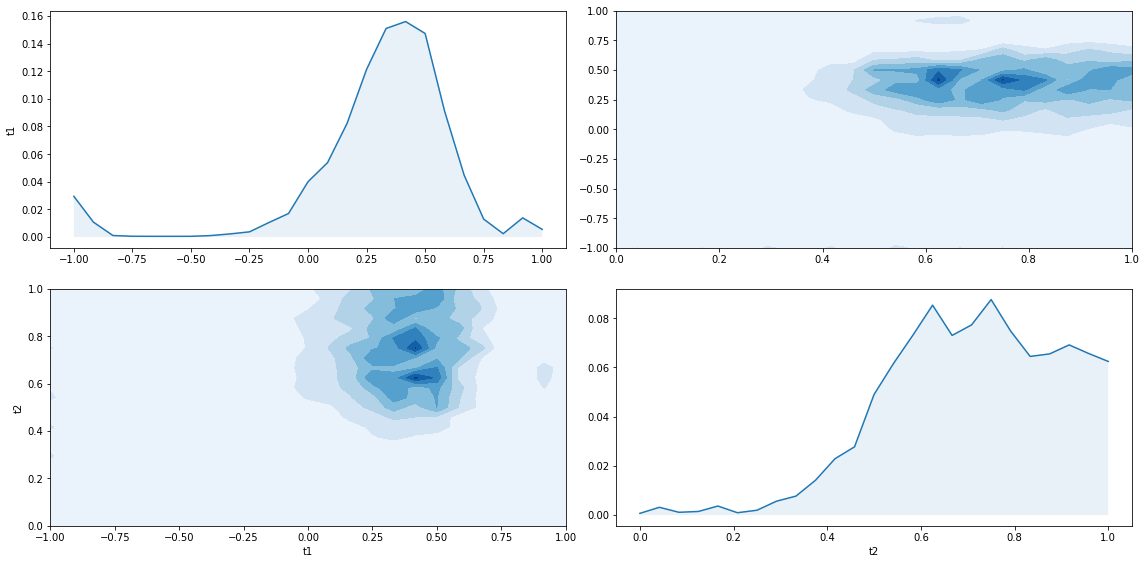

In [11]:
# Visualize pairs
lfire_res.plot_pairs();

evaluate with new observations:

In [12]:
simulator_name=list(m.observed.keys())[0]
simulator_name

'Y'

In [13]:
lfire_method.parameter_names

['t1', 't2']

In [14]:
true_params=[-0.5,0.3]

In [15]:
new_observations=m[simulator_name].generate(with_values={'t1': true_params[0], 't2': true_params[1]})

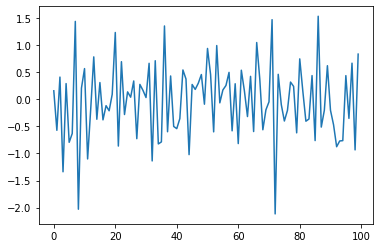

In [16]:
plt.plot(np.squeeze(new_observations));

In [17]:
%time new_res = lfire_method.infer(observed={simulator_name: new_observations})

CPU times: user 61.1 ms, sys: 1.33 ms, total: 62.5 ms
Wall time: 64 ms


In [18]:
new_res.summary()

Method: LFIRE
Number of simulations: 312500
MAP estimates: t1: -0.417, t2: 0.375
Posterior means: t1: -0.308, t2: 0.579



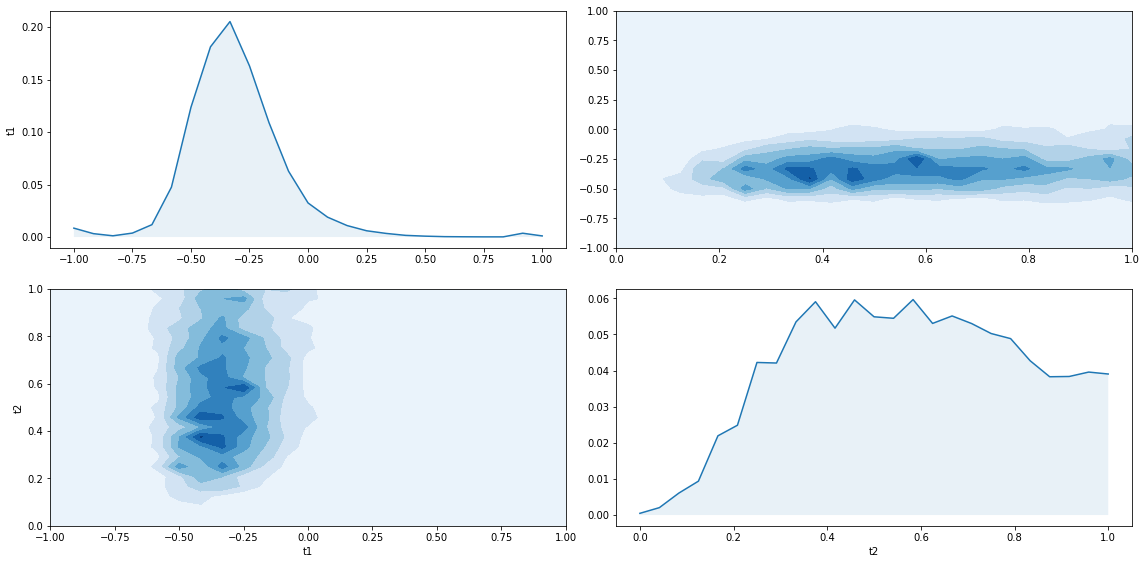

In [19]:
new_res.plot_pairs();

save models:

In [20]:
lfire_method.save_models('arch_model_1_500')